In [23]:
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
from torch.autograd import Variable
torch.manual_seed(1) # reproducible

In [24]:
x = torch.unsqueeze(torch.linspace(-1,1,100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())
x, y = Variable(x, requires_grad = False), Variable(y, requires_grad = False)

In [25]:
def save():
    net1 = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1)
    )
    optimizer = torch.optim.SGD(net1.parameters(),lr=0.2)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)     # input x and predict based on x

        loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
    torch.save(net1, 'net.pkl') # entire net
    torch.save(net1.state_dict(), 'net_params.pkl') # parameters

    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [26]:
def restore_net():
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [27]:
def restore_params():
    net3 = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1)
    )
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    plt.subplot(133)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

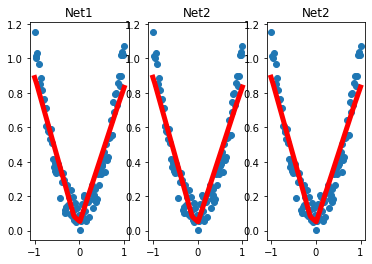

In [28]:
# save net1
save()

# restore entire net (may slow)
restore_net()

# restore only the net parameters
restore_params()
